In [ ]:
# Postdam PM2.5 Ensemble Boosting  Forcasting 

* Between 2013 and 2023, data collected by DEBB021 was used.
* To increase the accuracy of PM2.5 data estimation, NO2, O3, SO2, PM10 pollutant gas data accepted by the EEA was added.


In [1]:
# imports
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np, pandas as pd

In [2]:
# import src
import model_base as mb
import boosting as bo

/Users/tugcekonuklar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Exploration

* Load Data


In [3]:
df= mb.get_cleaned_datetime_df()
mb.set_start_date_time_index(df)
df.head()

,Start_Timestamp,End_Timestamp,End,PM2.5-Pollutant,PM2.5-Value,PM2.5-Unit,PM2.5-Validity,PM2.5-Verification,PM10-Pollutant,PM10-Value,...,O3-Pollutant,O3-Value,O3-Unit,O3-Validity,O3-Verification,SO2-Pollutant,SO2-Value,SO2-Unit,SO2-Validity,SO2-Verification
Start,,,,,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00,1356998400,1357002000,2013-01-01 01:00:00,6001,71.04,ug.m-3,1,1,5,88.96,...,7,43.17,ug.m-3,1,1,1,12.18,ug.m-3,1,1
2013-01-01 01:00:00,1357002000,1357005600,2013-01-01 02:00:00,6001,20.52,ug.m-3,1,1,5,25.17,...,7,57.15,ug.m-3,1,1,1,4.65,ug.m-3,1,1
2013-01-01 02:00:00,1357005600,1357009200,2013-01-01 03:00:00,6001,9.56,ug.m-3,1,1,5,11.97,...,7,63.31,ug.m-3,1,1,1,1.33,ug.m-3,1,1
2013-01-01 03:00:00,1357009200,1357012800,2013-01-01 04:00:00,6001,9.45,ug.m-3,1,1,5,11.73,...,7,63.18,ug.m-3,1,1,1,1.33,ug.m-3,1,1
2013-01-01 04:00:00,1357012800,1357016400,2013-01-01 05:00:00,6001,13.02,ug.m-3,1,1,5,15.88,...,7,61.70,ug.m-3,1,1,1,1.33,ug.m-3,1,1


## Splitting Data 

Train, Validation and Test data

In [4]:
train_data, validation_data, test_data = mb.split_data(df)

Training set size: 52588
Validation set size: 17529
Test set size: 17531


In [5]:
# Extract the features
X_train, X_val, X_test = mb.extract_features(train_data, validation_data, test_data)
# Extract the target variable
y_train, y_val, y_test = mb.extract_target(train_data, validation_data, test_data)

# Gradiend Boosting


Gradient Boosting is an ensemble machine learning algorithm that combines the predictions of sequentially trained weak learners, typically decision trees, to create a strong model. It corrects its predecessors' errors by focusing on challenging cases. Optimization is guided by gradient descent, adjusting each tree's contribution using a learning rate. It's effective for both regression and classification, offering high predictive accuracy and handling feature importance well. Popular variants like XGBoost, LightGBM, and CatBoost provide faster and more scalable implementations. Despite its strengths, Gradient Boosting can be computationally intensive and may overfit if not carefully regularized.

Training set size: 52588
Validation set size: 17529
Test set size: 17531
[10.16448883  8.27555366  7.59540006 ...  6.35580766  6.03163194
  5.89936876]
MAE: 1.7436
MSE: 8.4828
RMSE: 2.9125
MAPE: 0.2454
MASE: 1.682233766667772
[6.37462732 6.55155096 5.97026569 ... 7.15592554 6.94614214 8.89910747]
MAE: 1.9488
MSE: 8.0315
RMSE: 2.8340
MAPE: 0.2657
MASE: 1.8042036245692794


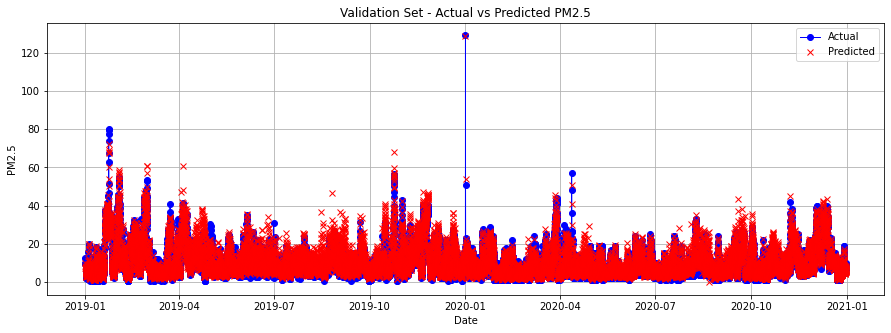

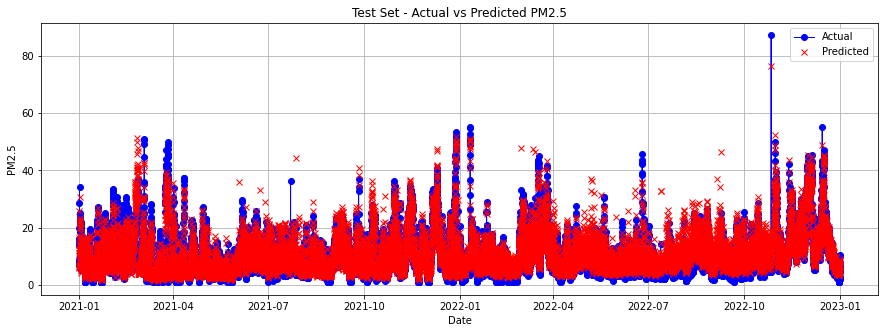

In [6]:
bo.train_and_evolve(df, 'gradient_boosting')

## Ada Boosting


Training set size: 52588
Validation set size: 17529
Test set size: 17531
[8.88386905 8.17042254 7.69660436 ... 6.84996422 6.22440678 6.39188079]
MAE: 1.6274
MSE: 7.3363
RMSE: 2.7086
MAPE: 0.2176
MASE: 1.5700924588337273
[6.92476442 6.84996422 6.29882353 ... 6.91300347 6.815948   9.41081744]
MAE: 1.8392
MSE: 7.2964
RMSE: 2.7012
MAPE: 0.2277
MASE: 1.7027563907259793


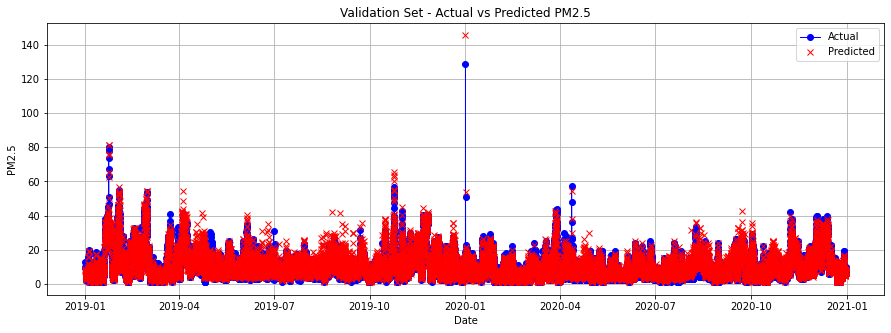

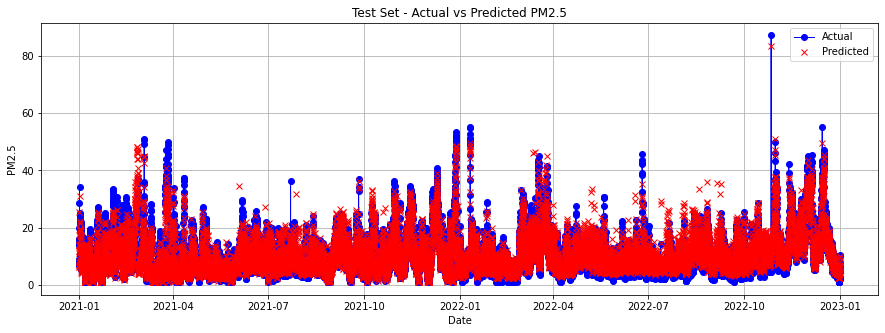

In [7]:
bo.train_and_evolve(df, 'adaboost')

# histogram_gradient_boosting


Training set size: 52588
Validation set size: 17529
Test set size: 17531
[9.08959735 7.95476226 7.52034014 ... 6.36406787 6.89614056 6.57046251]
MAE: 1.6945
MSE: 8.3181
RMSE: 2.8841
MAPE: 0.2369
MASE: 1.6348940244850565
[7.01148951 6.70344618 6.36077247 ... 6.8725816  6.94339756 9.39713781]
MAE: 1.8392
MSE: 7.5211
RMSE: 2.7425
MAPE: 0.2402
MASE: 1.7027550564343044


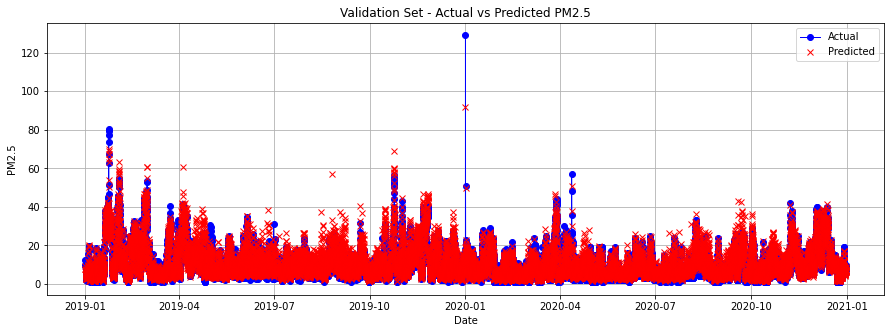

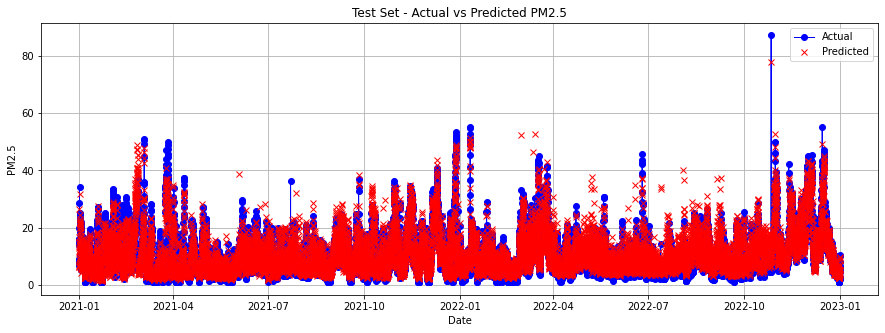

In [8]:
bo.train_and_evolve(df, 'histogram_gradient_boosting')

# xgboost

Training set size: 52588
Validation set size: 17529
Test set size: 17531
[8.927384  7.614763  7.2345343 ... 6.9046016 7.3972435 6.319197 ]
MAE: 1.7220
MSE: 8.7036
RMSE: 2.9502
MAPE: 0.2357
MASE: 1.6613550119148373
[ 7.2285895  6.769041   6.669219  ...  7.0569773  6.630104  11.072439 ]
MAE: 1.8914
MSE: 8.0743
RMSE: 2.8415
MAPE: 0.2454
MASE: 1.7510831523862211


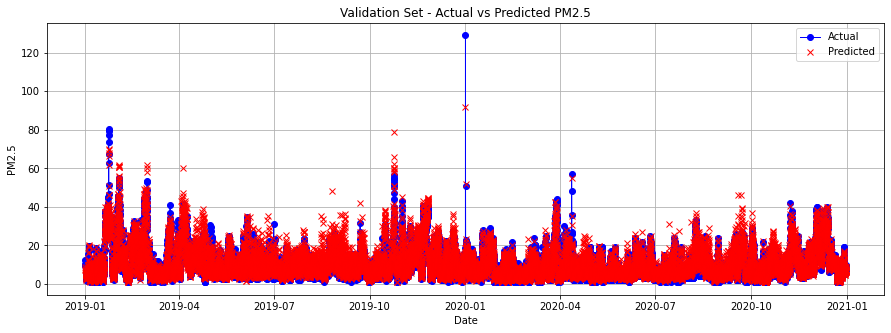

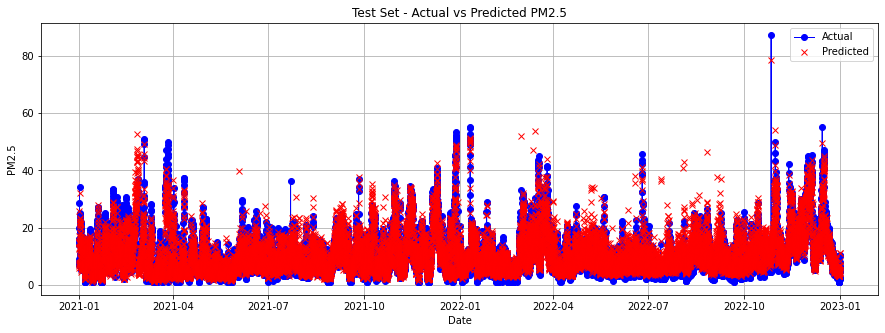

In [9]:
bo.train_and_evolve(df, 'xgboost')

## CatBoost

CatBoosting Regression¶
CatBoost (Categorical Boosting) is an open-source gradient boosting library, developed at Yandex, that excels at working with categorical features without the need for extensive pre-processing. It uses a special algorithm to process categorical values and incorporates them into decision trees, which are then combined into a powerful ensemble model.

One of the standout features of CatBoost is its innovative handling of categorical data. Traditionally, machine learning models require categorical variables to be transformed into numerical format, which is typically done through one-hot encoding or label encoding. However, CatBoost automates this process by applying an efficient encoding scheme that uses statistical information from the categories to improve performance.

CatBoost also prioritizes speed and efficiency. It's designed to be fast even on large datasets and has GPU support for even quicker training. Additionally, it provides overfitting prevention mechanisms with its novel ordered boosting technique, which is a permutation-driven alternative to the classic gradient boosting method.

Furthermore, CatBoost comes with a user-friendly interface and is compatible with both Python and R. It offers several parameter tuning options to improve model performance and can handle missing values internally. Its robustness and ease of use make it a popular choice for both regression and classification problems across various fields, from finance to biology.

Training set size: 52588
Validation set size: 17529
Test set size: 17531
0:	learn: 10.3820969	total: 62.4ms	remaining: 12.4s
1:	learn: 9.6145983	total: 65.6ms	remaining: 6.49s
2:	learn: 8.9241913	total: 68ms	remaining: 4.47s
3:	learn: 8.3246541	total: 70.4ms	remaining: 3.45s
4:	learn: 7.7838157	total: 72.7ms	remaining: 2.83s
5:	learn: 7.3071027	total: 75.2ms	remaining: 2.43s
6:	learn: 6.8752211	total: 77.6ms	remaining: 2.14s
7:	learn: 6.4935056	total: 80ms	remaining: 1.92s
8:	learn: 6.1592734	total: 82.4ms	remaining: 1.75s
9:	learn: 5.8638016	total: 84.5ms	remaining: 1.6s
10:	learn: 5.5876644	total: 86.6ms	remaining: 1.49s
11:	learn: 5.3570792	total: 88.9ms	remaining: 1.39s
12:	learn: 5.1461488	total: 91.3ms	remaining: 1.31s
13:	learn: 4.9510337	total: 93.6ms	remaining: 1.24s
14:	learn: 4.7926652	total: 96ms	remaining: 1.18s
15:	learn: 4.6541262	total: 98.2ms	remaining: 1.13s
16:	learn: 4.5259667	total: 100ms	remaining: 1.08s
17:	learn: 4.4140908	total: 103ms	remaining: 1.04s
18:	learn

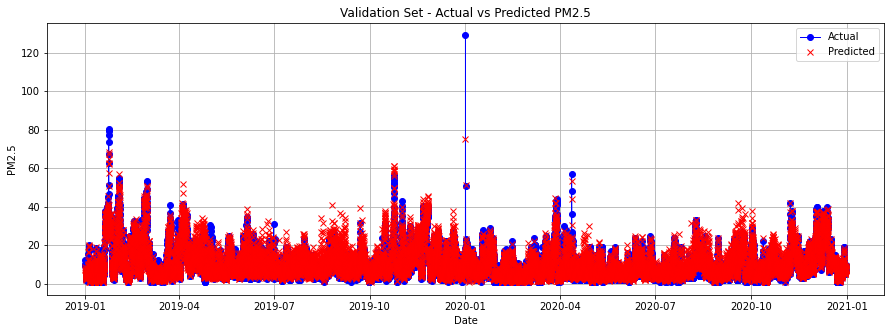

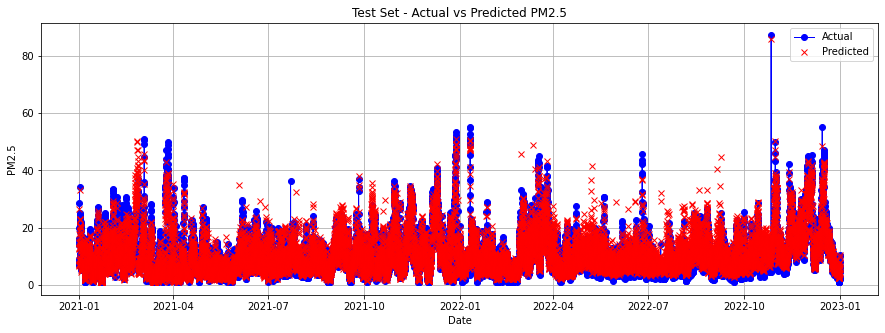

In [10]:
bo.train_and_evolve(df,'catboost')

# HyperPramater Tuning


In [11]:
# best_gb_estimater_model = bo.tune_and_evaluate_boosting(df, 'gradient_boosting')

In [12]:
# best_ada_gb_estimater_model = bo.tune_and_evaluate_boosting(df, 'adaboost')

In [13]:
# best_hist_gb_estimater_model = bo.tune_and_evaluate_boosting(df, 'histogram_gradient_boosting')

In [14]:
# best_xgb_estimater_model = bo.tune_and_evaluate_boosting(df, 'xgboost')

In [15]:
# best_catboost_estimater_model = bo.tune_and_evaluate_boosting(df, 'catboost')